## Cargamos los datasets y dividimos en train y test

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargamos los datasets
df_X = pd.read_csv("processed_dataset.csv")
df_y = pd.read_csv("train_labels.csv")

# Los juntamos de forma inner para que no haya Nan
df = pd.merge(df_X, df_y, how = "inner", on = "ID")

# Ya no necesitamos la columna ID
df.drop(["ID"], axis = "columns", inplace = True)

# Dividimos en X e y
df_train_y = df["label"]
df_train_X = df.drop(["label"], axis = "columns")

# Hacemos una primera división en train (80% de los datos) y test (20%) sets
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(df_train_X, df_train_y, train_size=0.8, random_state=42)

# Dividimos este subset en 32% para entrenamiento y 8% para prueba. Para el Grid Search del KNN y el modelo final de SVC.
X_train, X_test, y_train, y_test = train_test_split(X_train_big, y_train_big, train_size=0.32, test_size=0.08, random_state=42)

# Vemos las dimensiones de entrenamiento y test
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (69203, 34)
Tamaño de X_test: (17301, 34)
Tamaño de y_train: (69203,)
Tamaño de y_test: (17301,)


In [4]:
df_X.columns

Index(['ID', 'Payment_6804_mean', 'Payment_6804_std', 'Infraction_CGP_mean',
       'Infraction_CGP_std', 'Base_7744_mean', 'Base_7744_std',
       'Base_80863_mean', 'Base_80863_std', 'Risk_1930_mean', 'Risk_1930_std',
       'Expenditure_JIG_mean', 'Expenditure_JIG_std', 'Infraction_SNZ_mean',
       'Infraction_SNZ_std', 'Base_02683_mean', 'Base_02683_std',
       'Infraction_SBF_mean', 'Infraction_SBF_std', 'Infraction_ZWWJ_mean',
       'Infraction_ZWWJ_std', 'Infraction_QJJF_mean', 'Infraction_QJJF_std',
       'Base_76065_mean', 'Base_76065_std', 'Infraction_EJZ_mean',
       'Infraction_EJZ_std', 'Base_6872_mean', 'Base_6872_std',
       'Risk_0322_mean', 'Risk_0322_std', 'Infraction_FMXQ_mean',
       'Infraction_FMXQ_std', 'Infraction_GGO_mean', 'Infraction_GGO_std'],
      dtype='object')

In [5]:
# Vamos a reducir todavía más los conjuntos de train y test para hacer grid search del SVC ya que este es muy costoso
# y tarda más en entrenar en base a los distintos hiperparámetros
from sklearn.model_selection import train_test_split

# Sacamos el 50% del dataset anterior
df_X_reduced2, _, y_reduced2, _ = train_test_split(X_train, y_train, train_size=0.50, random_state=42)

# Dividimos este subset en 80% para entrenamiento y 20% para prueba
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_X_reduced2, y_reduced2, train_size=0.8, test_size=0.20,
                                                                    random_state=42)

# Vemos las dimensiones de entrenamiento y test
print("Tamaño de X_train_red:", X_train_red.shape)
print("Tamaño de X_test_red:", X_test_red.shape)
print("Tamaño de y_train_red:", y_train_red.shape)
print("Tamaño de y_test_red:", y_test_red.shape)

Tamaño de X_train_red: (27680, 34)
Tamaño de X_test_red: (6921, 34)
Tamaño de y_train_red: (27680,)
Tamaño de y_test_red: (6921,)


# 2. Aplicación de modelos de aprendizaje supervisado

Este apartado incluye realizar un estudio detallado de técnicas de clasificación supervisada,
incluyendo los siguientes modelos:

## Métodos clásicos: Lineal, Polinomial, Logística

In [9]:
# Modelo Lineal
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
from sklearn.metrics import classification_report
import time

# En todos los modelos, vamos a ver cuánto tardan en entrenar
start_time = time.time()

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train_big, y_train_big)

y_pred = model.predict(X_test_big)      # Hacemos predicciones con el conjunto de prueba

# Redondeamos las predicciones para convertirlas en clases (0 o 1)
y_pred_class = np.round(y_pred).astype(int)

# Accuracy
accuracy = accuracy_score(y_test_big, y_pred_class)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test_big, y_pred_class, average='weighted') 
print(f"F1 Score: {f1}")

end_time = time.time()
# Calculamos el tiempo transcurrido
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time} segundos")

Accuracy: 0.8847683344122815
F1 Score: 0.8833800486180842
Tiempo transcurrido: 0.29244422912597656 segundos


Como es de esperar, obtenemos valores de accuracy y f1 no muy altos, aunque en verdad bastante para lo que es el modelo, ya que un modelo lineal es un modelo demasiado simple para todas las características que tenemos.

In [11]:
# Modelo polinomial de grado 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

start_time = time.time()

# Creamos un pipeline con las transformaciones y el modelo (así se entrenan los datos con ambos modelos secuencialmente)
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # Modelo polinomial de grado 2
    ('model', LinearRegression())  # Modelo de regresión lineal
])

# Entrenamos el pipeline
pipeline.fit(X_train_big, y_train_big)

# Hacemos predicciones con el conjunto de prueba
y_pred = pipeline.predict(X_test_big)

# Redondeamos las predicciones para convertirlas en clases (0 o 1)
y_pred_class = np.round(y_pred).astype(int)

# Accuracy
accuracy = accuracy_score(y_test_big, y_pred_class)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test_big, y_pred_class, average='weighted')
print(f"F1 Score: {f1}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time} segundos")

Accuracy: 0.9104411356700268
F1 Score: 0.9102448793540651
Tiempo transcurrido: 10.45392894744873 segundos


Era de esperar que el modelo polinomial predijese mejor que el lineal.

In [13]:
# Modelo logístico
from sklearn.linear_model import LogisticRegression

start_time = time.time()

# Creamos el modelo de regresión logística
logistic_model = LogisticRegression()

# Entrenamos el modelo
logistic_model.fit(X_train_big, y_train_big)

# Hacemso predicciones, en este caso la salida será 0 o 1
y_pred = logistic_model.predict(X_test_big)

# Accuracy
accuracy = accuracy_score(y_test_big, y_pred)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test_big, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Mostramos el classification report
print(classification_report(y_test_big, y_pred))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time} segundos")

Accuracy: 0.8887080366225839
F1 Score: 0.8877869971582988
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     39773
           1       0.80      0.76      0.78     14292

    accuracy                           0.89     54065
   macro avg       0.86      0.85      0.85     54065
weighted avg       0.89      0.89      0.89     54065

Tiempo transcurrido: 0.6068494319915771 segundos


## Árboles de decisión

Utilizaremos un Random Forest Classifier ya que esto es un problema de clasificación. No tiene sentido probar con DecisionTreeClassifier o ExtraTreeClassifier porque queremos capturar las relaciones complejas entre nuestro conjunto de datos que es muy grande, y estos modelo son más débiles.

In [16]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

# Instanciamos el modelo con 100 árboles
modelo = RandomForestClassifier(n_estimators=90, random_state=42)

# Entrenamos el modelo
modelo.fit(X_train_big, y_train_big)

# Hacemos predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_big)

# Accuracy
accuracy = accuracy_score(y_test_big, y_pred)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test_big, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Mostramos el classification report
print(classification_report(y_test_big, y_pred))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time/60} minutos")

Accuracy: 0.9441413113844447
F1 Score: 0.9438025285591432
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     39773
           1       0.91      0.88      0.89     14292

    accuracy                           0.94     54065
   macro avg       0.93      0.92      0.93     54065
weighted avg       0.94      0.94      0.94     54065

Tiempo transcurrido: 2.5616464694341023 minutos


Vamos a guardar este modelo, al ser el que mejores resultados ofrece de todos, para usar en best_models

In [18]:
import pickle 

# Guardamos el modelo en un archivo
with open('modelo_randomforest.pkl', 'wb') as file:
    pickle.dump(modelo, file)

## Aprendizaje basado en instancias

Vamos a utilizar el modelo KNN (basado en instancias), que no aprende parámetros.  
Para ello vamos a hacer un Grid Search para encontrar los valores que maximizan el f1-score en función de los hiperparámetros "n_neighbors" que hace referencia al número de vecinos que se fija para la clasificación, y "weights" que es el tipo de pesos que se asigna, puede ser uniforme, es decir la misma importancia a todos los n_neighbors, o según la distancia, que da más importancia en la decisión a los vecinos más cercanos.

No utilizamos conjunto de validación ya que el grid search utiliza validación cruzada dividiendo el conjunto de entrenamiento en varios plieges (cv=5). Así, cada combinación de hiperparámetros se entrena y valida en los diferentes subconjuntos de datos, obteniendo el promedio de las métricas de cada pliegue para evaluar el rendimiento.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

start_time = time.time()

# Creamos el modelo KNN
knn_model = KNeighborsClassifier()

# Definimos el rango de valores para n_neighbors
param_grid = {
    'n_neighbors': list(range(3, 16, 3)),  # Valores de 3, 6, 9, 12, 15
    'weights': ["distance", "uniform"]
}

# Scoring F1
scorer = make_scorer(f1_score, average='weighted')

# Configuramos el GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring=scorer, cv=5,
                          return_train_score=True)                            # cv=5 para validación cruzada de 5 pliegues

# Entrenamos el modelo en los datos de entrenamiento
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)

# Extraemos las columnas que nos interesan: parámetros, mean_test_score y rank_test_score
f1_scores = results[['params', 'mean_test_score', 'rank_test_score']]

print(f1_scores)

# Nos queamos con el mejor valor de n_neighbors y el score correspondiente
print(f"Mejor valor de n_neighbors: {grid_search.best_params_['n_neighbors']}")
print(f"Mejor valor de weights: {grid_search.best_params_['weights']}")
print(f"Mejor F1-score obtenido: {grid_search.best_score_}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time/60} minutos")

                                       params  mean_test_score  \
0   {'n_neighbors': 3, 'weights': 'distance'}         0.881380   
1    {'n_neighbors': 3, 'weights': 'uniform'}         0.881386   
2   {'n_neighbors': 6, 'weights': 'distance'}         0.887225   
3    {'n_neighbors': 6, 'weights': 'uniform'}         0.885691   
4   {'n_neighbors': 9, 'weights': 'distance'}         0.890643   
5    {'n_neighbors': 9, 'weights': 'uniform'}         0.890693   
6  {'n_neighbors': 12, 'weights': 'distance'}         0.891454   
7   {'n_neighbors': 12, 'weights': 'uniform'}         0.889906   
8  {'n_neighbors': 15, 'weights': 'distance'}         0.891835   
9   {'n_neighbors': 15, 'weights': 'uniform'}         0.891943   

   rank_test_score  
0               10  
1                9  
2                7  
3                8  
4                5  
5                4  
6                3  
7                6  
8                2  
9                1  
Mejor valor de n_neighbors: 15
Mejor valor

Como podemos ver, el F1 de usar weights = distance o uniforme, no varía prácticamente nada , pero vemos que cuantos más vecinos escogemos, mejor puntuación F1 obtenemos, como era de esperar ya que así tenemos más datos de referencia para hacer la clasificación aunque pasado cierto número de vecinos, ya no mejora el modelo.

Una vez ya tenemos escogidos nuestros hiperparámetros, n_neighbors = 15 y weights = "distance", vamos a entrenar con más datos nuestro modelo KNN

In [25]:
start_time = time.time()

# Creamos el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors = 15, weights = "distance")

# Entrenamos el modelo
knn_model.fit(X_train_big, y_train_big)

# Hacemos predicciones en el conjunto de prueba
y_pred = knn_model.predict(X_test_big)

# Accuracy
accuracy = accuracy_score(y_test_big, y_pred)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test_big, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Mostramos el classification report
print(classification_report(y_test_big, y_pred))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time} segundos")

Accuracy: 0.8943308979931563
F1 Score: 0.8947964092439439
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     39773
           1       0.79      0.81      0.80     14292

    accuracy                           0.89     54065
   macro avg       0.86      0.87      0.87     54065
weighted avg       0.90      0.89      0.89     54065

Tiempo transcurrido: 14.810671329498291 segundos


## Máquinas de Soporte Vectorial

Usaremos la SVM con norma 2 (no lineal) ya que son datos que están en varias dimensiones.  
Para ello vamos a hacer un Grid Search para encontrar los mejores hiperparámetros "kernel" que es el tipo de núcleo que utiliza la SVM para afrontar problemas no lineales y "C" que es la penalización.

El hiperparámetro gamma, controla la influencia de un punto de entrenamiento en la clasificación. Lo pondremos con la opción "scale", que lo ajusta dinámicamente para que la influencia de cada punto sea más equilibrada. Así reducimos el riesgo de sobreajuste o subajuste.

Al igual que en el anterior Grid Search, no utilizamos conjunto de validación ya que aplicamos validación cruzada en 5 pliegues.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report, make_scorer
import time

start_time = time.time()

# Definimos el modelo SVC
svm_model = SVC(gamma = "scale")

# Definimos los hiperparámetros a probar
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': list(range(1,4)),
}

# Scoring F1
scorer = make_scorer(f1_score, average='weighted')

# Configuramos el GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scorer, cv=5)

# Entrenamos el GridSearchCV
grid_search.fit(X_train_red, y_train_red)

results = pd.DataFrame(grid_search.cv_results_)

# Extraemos las columnas que nos interesan: parámetros, mean_test_score y rank_test_score
f1_scores = results[['params', 'mean_test_score', 'rank_test_score']]

print(f1_scores)

# Obtenemos los mejores parámetros y resultados
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores parámetros:", best_params)

# Tiempo de ejecución
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time/60} minutos")


                          params  mean_test_score  rank_test_score
0     {'C': 1, 'kernel': 'poly'}         0.893453                6
1      {'C': 1, 'kernel': 'rbf'}         0.902058                3
2  {'C': 1, 'kernel': 'sigmoid'}         0.818620                7
3     {'C': 2, 'kernel': 'poly'}         0.895488                4
4      {'C': 2, 'kernel': 'rbf'}         0.905063                2
5  {'C': 2, 'kernel': 'sigmoid'}         0.818259                9
6     {'C': 3, 'kernel': 'poly'}         0.895305                5
7      {'C': 3, 'kernel': 'rbf'}         0.906201                1
8  {'C': 3, 'kernel': 'sigmoid'}         0.818364                8
Mejores parámetros: {'C': 3, 'kernel': 'rbf'}
Tiempo transcurrido: 5.538920883337656 minutos


Una vez ya tenemos escogidos nuestros hiperparámetros, kernel = "rbf" y C = 3, vamos a entrenar con más datos nuestro modelo SVC. Este no lo entrenamos con el dataset entero porque el SVC es un modelo más costoso.

In [32]:
from sklearn.svm import SVC

start_time = time.time()

# Creamos el modelo SVM no lineal con kernel RBF
svm_model = SVC(kernel='rbf', C = 3, gamma='scale')  # Kernel no lineal

# Entrenamos el modelo
svm_model.fit(X_train, y_train)

# Predecimos
y_pred = svm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Mostramos el classification report
print(classification_report(y_test, y_pred))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time/60} minutos")

Accuracy: 0.9164210161262355
F1 Score: 0.9159476688298921
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     12743
           1       0.85      0.82      0.84      4558

    accuracy                           0.92     17301
   macro avg       0.90      0.89      0.89     17301
weighted avg       0.92      0.92      0.92     17301

Tiempo transcurrido: 1.9470203677813211 minutos


## Redes neuronales (usando capas fully connected y dropout)

Primero probamos con un el Perceptrón Multicapa de sklearn (más básico) formado por una capa con 100 neuronas.

In [35]:
from sklearn.neural_network import MLPClassifier

start_time = time.time()

# Creamos un clasificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(100), max_iter=4000, random_state=1)

# Entrenamos el modelo
mlp.fit(X_train_big, y_train_big)

# Predecimos
y_pred = mlp.predict(X_test_big)

# Accuracy
accuracy = accuracy_score(y_test_big, y_pred)
print(f"Accuracy: {accuracy}")

# F1-score
f1 = f1_score(y_test_big, y_pred, average='weighted')
print(f"F1 Score: {f1}")

# Informe de clasificación
print(classification_report(y_test_big, y_pred))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo transcurrido: {elapsed_time/60} minutos")

Accuracy: 0.9316933321002497
F1 Score: 0.9315359813348464
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     39773
           1       0.88      0.86      0.87     14292

    accuracy                           0.93     54065
   macro avg       0.91      0.91      0.91     54065
weighted avg       0.93      0.93      0.93     54065

Tiempo transcurrido: 6.759073980649313 minutos


Vamos a probar con un modelo más complejo de Keras

Dividimos en conjunto de train y validación

In [38]:
from sklearn.model_selection import train_test_split

# Hacemos una división del conjunto de test grande en 50% de conjunto de validación y 50% de conjunto de test
X_val, X_test_big, y_val, y_test_big = train_test_split(X_test_big, y_test_big, train_size=0.5, random_state=40)

Epoch 1/20


C:\Users\Alonso\anaconda3\envs\Python310\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6759/6759 ━━━━━━━━━━━━━━━━━━━━ 6s 807us/step - f1_metric: 0.7722 - loss: 0.2702 - val_f1_metric: 0.8107 - val_loss: 0.2244
Epoch 2/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 5s 769us/step - f1_metric: 0.8054 - loss: 0.2300 - val_f1_metric: 0.8139 - val_loss: 0.2169
Epoch 3/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 6s 831us/step - f1_metric: 0.8148 - loss: 0.2241 - val_f1_metric: 0.8200 - val_loss: 0.2149
Epoch 4/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 5s 790us/step - f1_metric: 0.8142 - loss: 0.2225 - val_f1_metric: 0.8241 - val_loss: 0.2119
Epoch 5/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 5s 798us/step - f1_metric: 0.8172 - loss: 0.2176 - val_f1_metric: 0.8259 - val_loss: 0.2097
Epoch 6/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 5s 800us/step - f1_metric: 0.8194 - loss: 0.2205 - val_f1_metric: 0.8265 - val_loss: 0.2129
Epoch 7/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 6s 812us/step - f1_metric: 0.8214 - loss: 0.2176 - val_f1_metric: 0.8287 - val_loss: 0.2071
Epoch 8/20
6759/6759 ━━━━━━━━━━━━━━━━━━━━ 5s 793us/step - f1_metric: 0.82

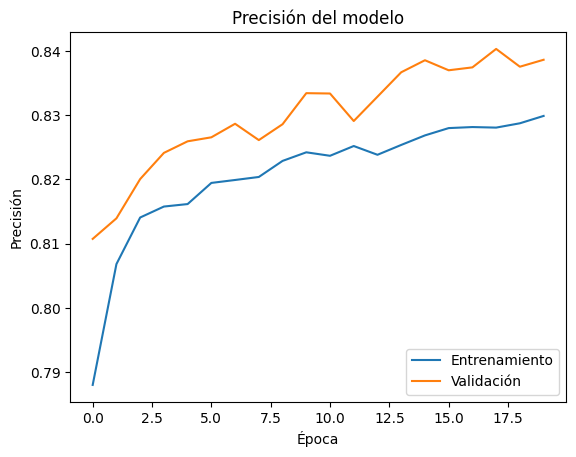

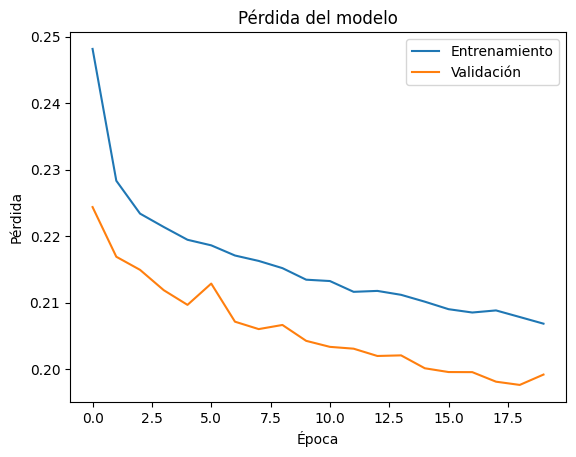

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from keras.regularizers import l2
import tensorflow.keras.backend as K
import numpy as np

def f1_metric(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.round(y_pred)  # Convertimos las predicciones a 0 o 1
    tp = K.sum(K.cast(y_true * y_pred, 'float32'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'), axis=0)
    f1 = 2 * tp / (2 * tp + fp + fn + K.epsilon())
    return f1

# Definimos el modelo compuesto por varias capas secuenciales
model = Sequential([
    Dense(100, input_dim = X_train_big.shape[1], activation='relu'), # Capa densa con 100 neuronas
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Capa de salida 
])

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[f1_metric])

# Entrenamos el modelo
history = model.fit(X_train_big, y_train_big, validation_data=(X_val, y_val), epochs=20, batch_size=32)

loss, accuracy = model.evaluate(X_test_big, y_test_big, verbose=0)
print(f'Accuracy: {accuracy}')

# Obtenemos predicciones en el conjunto de prueba
y_pred = (model.predict(X_test_big) > 0.5).astype("int32")  # Convertir las probabilidades en 0 o 1

# F1-score
f1 = f1_score(y_test_big, y_pred)
print(f'F1 Score: {f1}')

# Visualizamos la historia de la precisión durante el entrenamiento
plt.plot(history.history["f1_metric"])
plt.plot(history.history['val_f1_metric'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

# Visualizamos la historia de la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

Si añadimos capas ocultas nos sale peor f1 score. Por lo que el MLPClassifier de sklearn precide mejor los resultados, incluso mejor que una red con capas densas y de dropout, siendo el segundo mejor modelo de todos.